**Project Title**: Energy_Consumption_and_Prediction


**Problem Statement** : Increasing energy demand makes it hard to manage resources efficiently.

**Aim** : The aim of the this project is to build a model that predicts energy use based on past data and other factors.

# **Data Preprocessing**

In [109]:
import pandas as pd
import numpy as np

By importing these two libraries in Python, allowing for data manipulation and numerical operations, respectively.

In [110]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=7ed3def6-4cf8-426c-ac2e-a57e90d20e4d
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 152MB/s]


Downloading the file from google drive.

In [111]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-111-68e29b680bbb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


Reading the file from the system.

In [112]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


I observed here that the **df.head()**
displays the first five rows of the DataFrame, which is useful for checking the data's structure and contents.

In [113]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


I observed here that the **df.tail()** displays the last five rows of the DataFrame, which is useful for reviewing the final entries in the data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


I observed here that **df.info()** provides a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage, which helps in understanding the dataset's structure and identifying missing or inconsistent data.

In [7]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(2), object(7)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Global_active_powe**r values are converted into float values, allowing for numerical operations.

In [8]:
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(3), object(6)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Global_reactive_power** values are converted into float values, allowing for numerical operations.

In [9]:
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(4), object(5)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Voltage** values are converted into float values, allowing for numerical operations.

In [10]:
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(5), object(4)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Global_intensity** values are converted into float values, allowing for numerical operations.

In [11]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(6), object(3)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Sub_metering_1** values are converted into float values, allowing for numerical operations.

In [12]:
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


I observed here that I applied this conversion, all **Sub_metering_2** values are converted into float values, allowing for numerical operations.

In [13]:
df.shape

(2075259, 9)

I observed here that **df.shape** returns the dimensions of the DataFrame as a tuple, showing the number of rows and columns, which helps in quickly understanding the size of the dataset.

In [14]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Global_active_power** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [15]:
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Global_reactive_power** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [16]:
df['Voltage'] = pd.to_numeric(df['Voltage'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Voltage** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [17]:
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Global_intensity** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [18]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Sub_metering_1** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [19]:
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Sub_metering_2** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [20]:
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'],errors = 'coerce')
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that after converting **Sub_metering_3** to numeric, **df.describe()** offers statistical summaries of the column, including count, mean, and range, which helps assess its distribution.

In [21]:
df.describe(include = object)

,Date,Time
count,2075259,2075259
unique,1442,1440
top,6/12/2008,17:24:00
freq,1440,1442


I observed that **df.describe(include='object')** summarizes categorical columns, showing counts, unique values, top and most frequent value.

In [22]:
df.isnull().any() # if there are any null values

,0
Date,False
Time,False
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True


Here, **df.isnull().any()** checks for null values in each column and returns a **boolean** Series. Finally, I observed that only **Sub_metering_3** has null values.

In [23]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


I observed that running **df.isnull().sum()** provides the total count of null values for **sub_metering_3**.

In [24]:
round(100 * df.Sub_metering_3.isnull().sum()/len(df),0)

1.0

I observed that **round(100 * df['Sub_metering_3'].isnull().sum() / len(df), 0)** calculates the percentage of missing values in the **Sub_metering_3**.

In [25]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


I observed that **df.describe()** for **Sub_metering_3** indicates 2,049,280 entries with a mean of 6.46, a standard deviation of 8.44, and a range from 0 to 31.0.

In [26]:
df.fillna(df['Sub_metering_3'].mean()) # replace null values with mean value

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


I observed that **df.fillna(df['Sub_metering_3'].mean())** replaces the null values in the **Sub_metering_3** column with its mean value.

In [27]:
df.fillna(0)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


I observed here, By using this zeros are filled instead of null.

In [28]:
df.fillna(0, inplace=True)

I obseved here, By using inplace to replace null values permanently.

In [29]:
df.fillna(df['Sub_metering_3'].median())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


I observed that **df.fillna(df['Sub_metering_3'].median())** replaces the null values in the **Sub_metering_3** column with its median values.

In [30]:
df.dropna().shape

(2075259, 9)

I observed that **df.dropna().shape** returns the dimensions of the DataFrame after removing all rows containing null values, helping to understand how many entries remain after handling missing data.

---------
--------



# **Data Visualization**

---

## Content

- Intro to Matplotlib & Seaborn
- Tencent Use Case
- Anatomy of Matplotlib
- Components of a Matplotlib plot
- Univariate Data Visualization
  - Categorical
    - Bar chart
    - Countplot
    - Pie chart
  - Continous
    - Histogram
    - KDE plot
    - Box and Whiskers plot

---

### Importing Matplotlib & Seaborn

In case of `matplotlib`,
- We don't need to import the entire library but just its sub-module `pyplot`.
- We'll use the alias name `plt`.

#### What is `pyplot`?  
- `pyplot` is a **sub-module for visualization** in `matplotlib`.
- Think of it as a **high-level API** which **makes plotting an easy task**.
- Data Scientists stick to using `pyplot` only unless they want to create **something totally new.

For `seaborn`,
- We will be importing the whole seaborn library as alias `sns`.

#### What is seaborn?

Seaborn is another visualization library which uses Matplotlib in the backend for plotting.

#### What is the major difference then between both matplotlib and seaborn?

- `Seaborn` is built on the top of `Pandas` and `Matplotlib`.
- Seaborn uses **fascinating themes** and **reduces number of code lines** by doing a lot of work in the backend.
- While matplotlib is used to **plot basic plots and add more functionlaity** on top of that

As we proceed through the lecture, we will see the difference between both the libraries.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

---

### Before we dive into learning these libraries, lets answer some general questions.

#### Why do even we need to visualize data?

- **Exploratory**  - I can’t see certain patterns just by crunching numbers (avg, rates, %ages).
- **Explanatory** -  I have the numbers crunches and insights ready, but I’d like a visual art for storytelling.

#### What do we already know?

**Data**
- Rows: Samples, Data-points, Records
- Columns: Features, Variables

At the fundamental level, we have two types of data:
- Numerical/Continous
- Categorical

Categorical can be further divided into:
  - **Ordinal:** Categorical data with an order (e.g. low, medium, high)
  - **Non-ordinal/nominal:** Categorical data without any order (e.g. Male/Female)


---

## Video Games Analysis

You are a Data Scientist at "Tencent Games".

You need to analyze what kind of games the company should create in order to perform better in the market.

In [12]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2024-11-08 07:48:00--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.103, 13.224.9.129, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  1.27MB/s    in 1.5s    

2024-11-08 07:48:03 (1.27 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [15]:
"""# tot_sales doesn't match with your Global sales in this dataset.

data['Tot_sales'] = data.NA_Sales + data.EU_Sales + data.JP_Sales + data.Other_Sales
data['Tot_sales']==data['Global_Sales']"""

"# tot_sales doesn't match with your Global sales in this dataset.\n\ndata['Tot_sales'] = data.NA_Sales + data.EU_Sales + data.JP_Sales + data.Other_Sales\ndata['Tot_sales']==data['Global_Sales']"

Notice that,
- columns like `Platform`, `Genre` are Categorical
- columns like `NA_Sales`, `Global_Sales`, `Rank` are Continuous

Furthermore,
- `Platform` is of nominal type (no proper order between the categories)
- `Year` is of ordinal type (an order exists between the categories)

---

### Introduction to Matplotlib

**How to create a basic plot using `plt`?**

Let's say we want to draw a curve passing through 3 points:
- (0, 3)
- (1, 5)
- (2, 9)

**How can we draw a curve using `matplotlib`?**

- by using the `plt.plot()` function

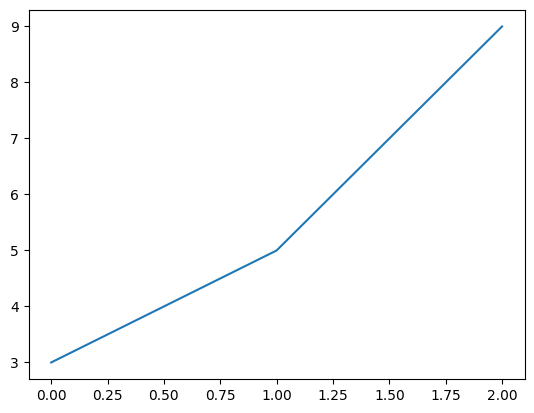

In [16]:
x_val = [0, 1, 2]
y_val = [3, 5, 9]
plt.plot(x_val, y_val)

(0, 6)
(-1, 5)
(2, -9)

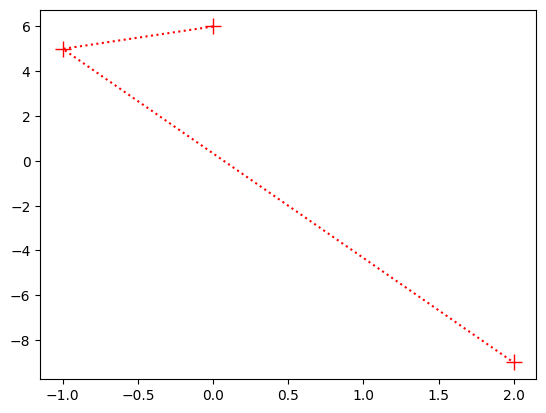

In [17]:
c1 = np.array([0,-1,2])
c2 = np.array([6,5,-9])
plt.plot(c1,c2, 'r+', markersize = 12, linestyle=":")

**What can we observe from this plot?**
  
- `plt.plot()` automatically decided the scale of the plot.
- It also prints the **type of object** i.e. `matplotlib.lines.Line2D`

While this command decided a lot of things for you, you can customise each of these by understanding the **components of a matplotlib plot**.

---

## Anatomy of Matplotlib

<!-- <img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/567/original/image_2022-11-10_121820129.png?1668062911"> -->


<!-- <img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" />
<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/579/original/image_2022-11-10_150131378.png?1668072693"> -->

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/019/615/original/image_2022-11-11_112008033.png?1668145811">

Woah! There is a lot of information in this image. Let's understand them one at a time.

---

### Components of a Matplotlib plot

- Figure: The **overall window** or page that everything is drawn on.
  - You can create multiple independent Figures in Jupyter.
  - If you run the code in terminal, separate windows will pop-up.
- Axes: You can add multiple **Axes** to the Figure, which represents a plot.

- **Axis**: Simply the `x-axis` and `y-axis`

- **Axes**: It is the **area** on which the **data is plotted** with functions such as `plot()`.
    - **x-label**: Name of x-axis
    - **y-label**: Name of y-axis

- **Major ticks**:
  - Subdivides the axis into major units.
  - They appear by default during plotting.
- **Minor ticks**:
  - Subdivides the major tick units.
  - They are by default hidden and can be toggled on.

- **Title**: Title of each plot **(Axes)**

- **Subtitle**: The common title of all the plots.

- **Legend**:
  - Describes the elements in the plot.
  - Blue and Green curves in this case.

These are the major components of a matplotlib plot.

---

### How to choose the right plot?

Firstly, it depends on the what is your question of interest.

When the question is clear
- How many variables are involved?
- Whether the variable(s) are numerical or categorical?

**How many variables are involved?**

- 1 Variable $\rightarrow$ Univariate Analysis
- 2 Variables $\rightarrow$ Bivariate Analysis
- 3+ Variables $\rightarrow$ Multivariate Analysis

**What are the possible cases?**

#### Univariate
- Numerical
- Categorical

#### Bivariate
- Numerical-Numerical
- Numerical-Categorical
- Categorical-Categorical

#### Multivariate

Let's start with these and then we can generalize.

- Numerical-Numerical-Categorical
- Categorical-Categorical-Numerical
- Categorical-Categorical-Categorical
- Numerical-Numerical-Numerical

---

### Univariate Data Visualization - Categorical Data

**What kind of questions we may want to ask for a categorical variable?**

- What is the Distribution/Frequency of the data across different categories?
- What proportion does a particular category constitutes?

<!-- - What are the top-5 most popular genre of games played?
- Or distribution of sales across various parts of the world? -->

...and so on

Let's take the categorical column "Genre".

**How can we find the top-5 genres?**

In [18]:
cat_counts = data['Genre'].value_counts()
cat_counts

,count
Genre,
Action,3316
Sports,2400
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


**What kind of plot can we use to visualize this information?**

- We can perhaps plot categories on X-axis and their corresponding frequencies on Y-axis.
- This is called a `Bar Chart` or a `Count Plot`.

### Bar Chart

- We can draw a bar plot using `plt.bar()`.
- The data is binned here into categories.

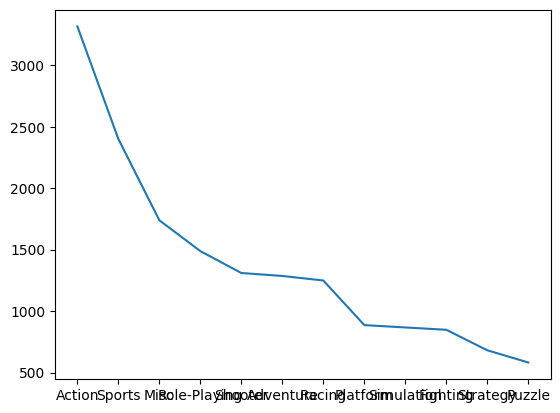

In [19]:
plt.plot(cat_counts) # plot doesn't work here

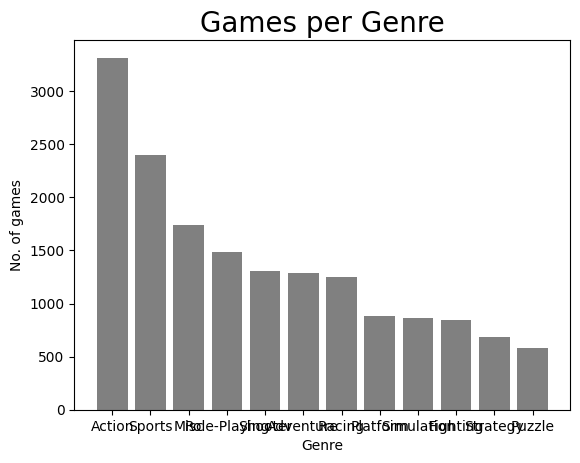

In [20]:
x_bar=cat_counts.index # generate verical bar chart or normal bar graph
y_bar=cat_counts
plt.xlabel('Genre')
plt.ylabel('No. of games')
plt.title('Games per Genre', fontsize=20)
r = plt.bar(x_bar,y_bar, color='grey') # storeable but not callable

<BarContainer object of 12 artists>

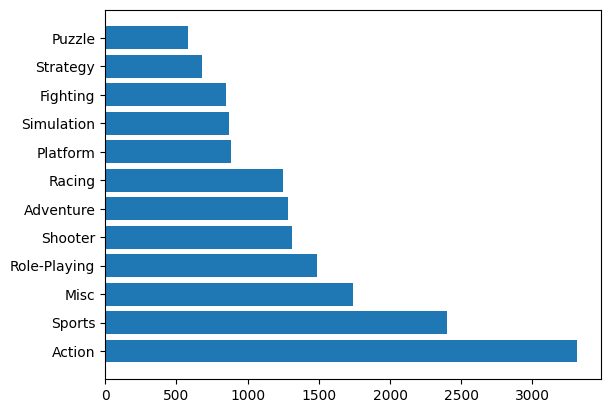

In [21]:
plt.barh(x_bar,y_bar)

In [22]:
r

<BarContainer object of 12 artists>

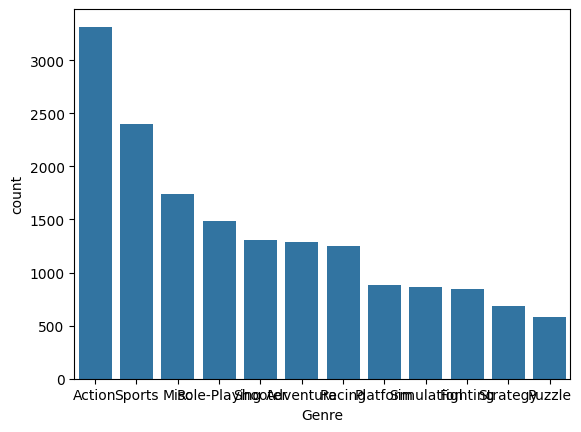

In [23]:
t = sns.barplot(cat_counts)

The names seem to be overlapping.

**How can we handle overlapping labels?**
1. Decrease the font size (not preferred)
2. Increase the figure size
3. Rotate the labels

**How can we change the plot size?**

<BarContainer object of 12 artists>

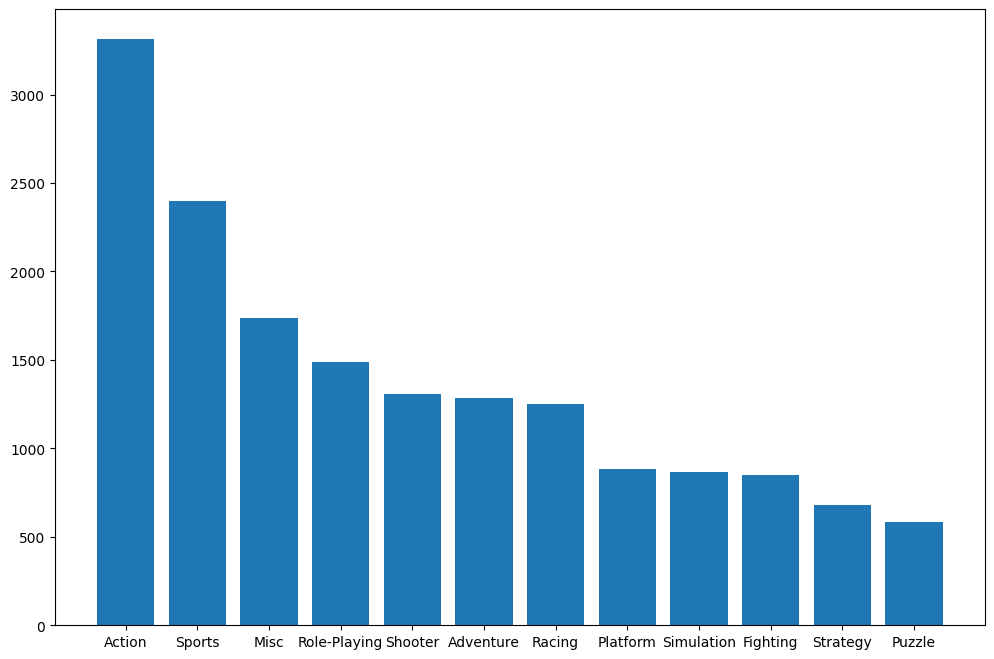

In [24]:
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar)

**How can we rotate the tick labels, also increase the fontsize of the same?**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

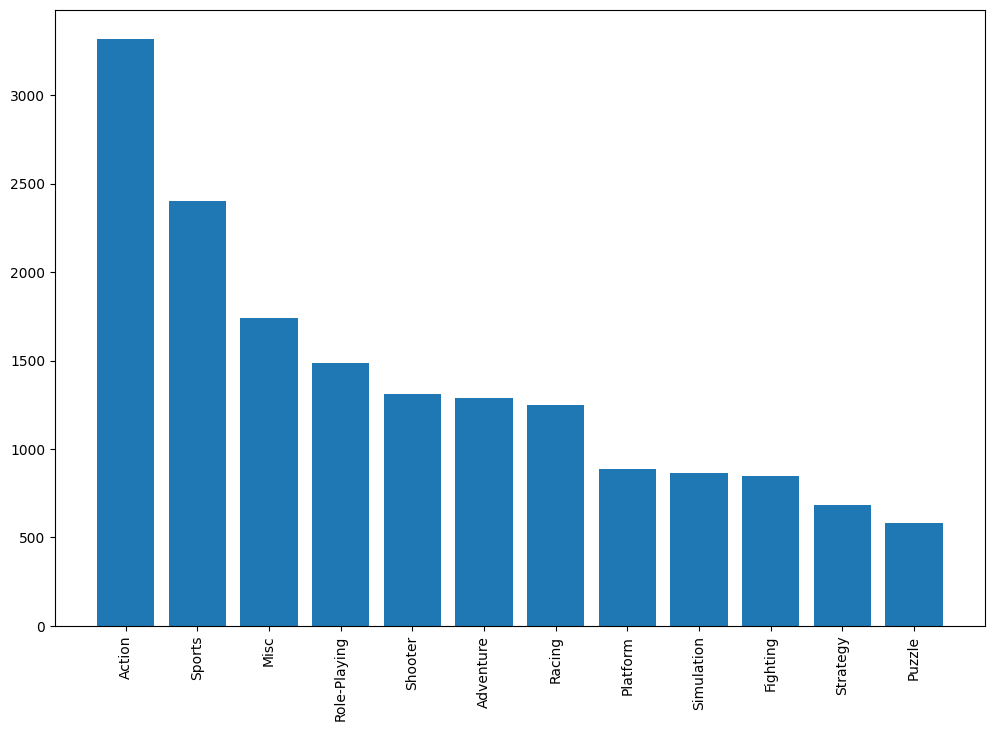

In [25]:
plt.figure(figsize=(12,8))
plt.bar(x_bar,y_bar)
plt.xticks(rotation=90, fontsize=10) # rotation take values in degree

If you notice, the width of each bar is **1**.

**Can we also change the width of these bars?**

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

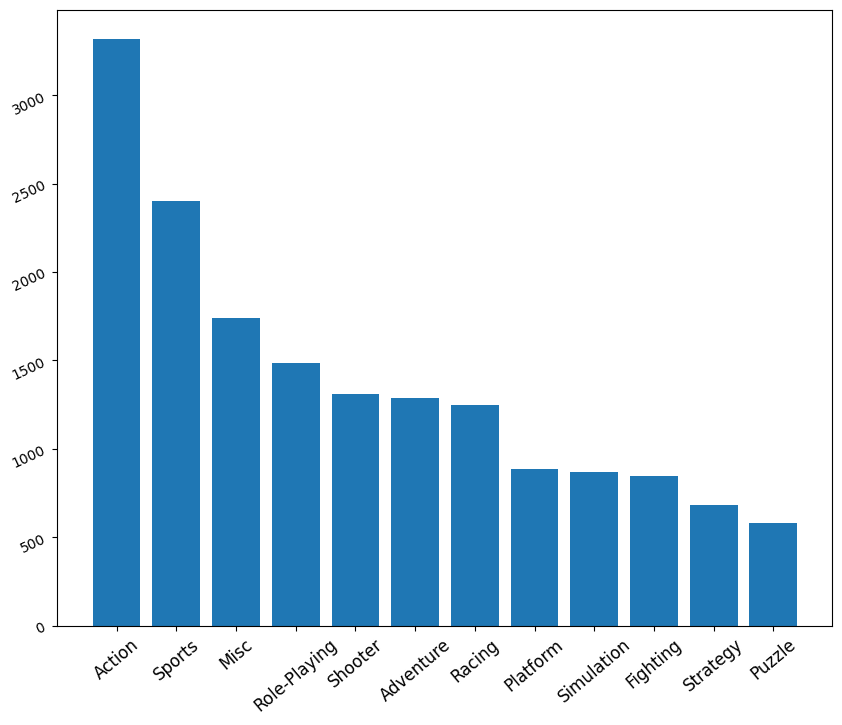

In [26]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.8)
plt.xticks(rotation=40, fontsize=12)
plt.yticks(rotation = 25)

**What about any adding some styling to the bars?**

- We can **change the colour of bars**
- We can add a **title to the axes**
- We can also **add x and y labels**

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

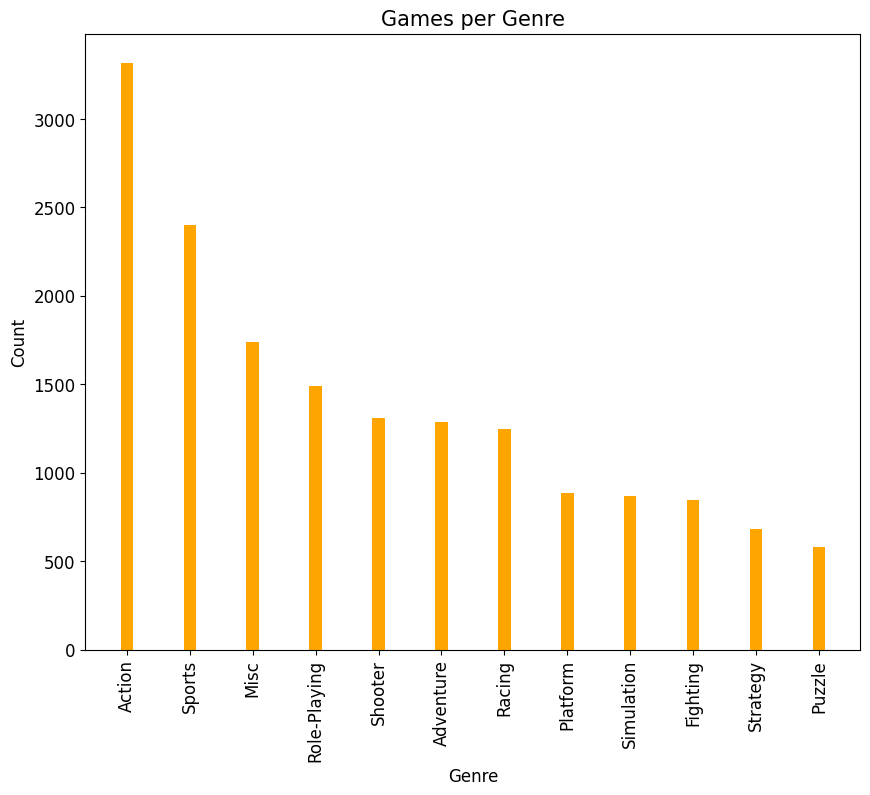

In [27]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.2,color='orange')
plt.title('Games per Genre',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)

If you notice, there's some text which is always printed before the plots.

This contains the data information of the plot.

**How can we remove the text printed before the plot?**
- by using `plt.show()` at the end

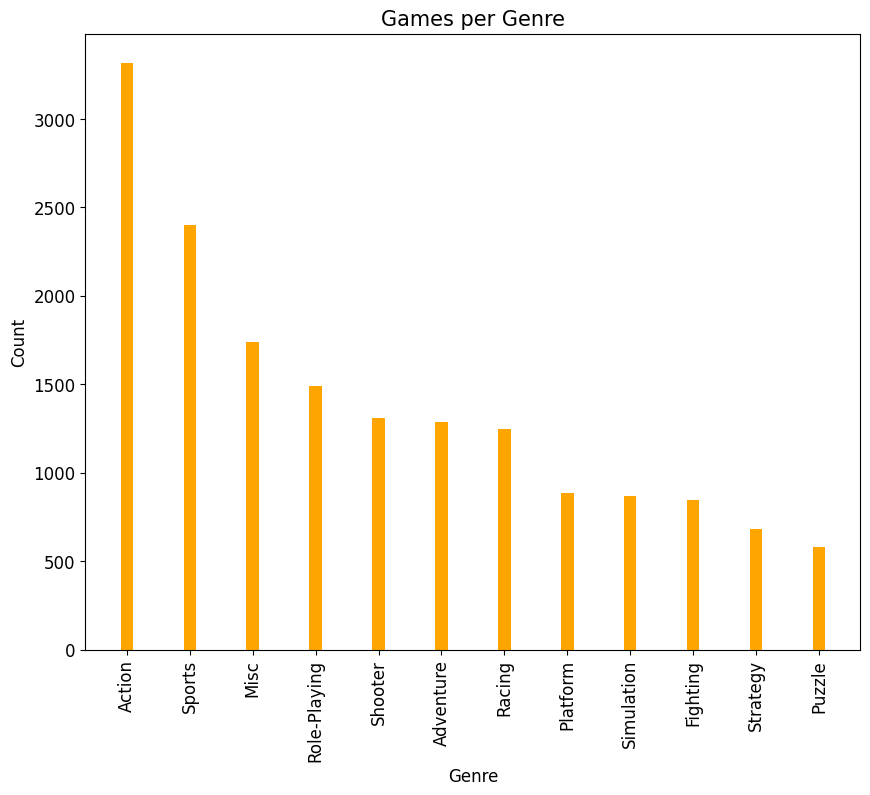

In [28]:
plt.figure(figsize=(10,8))
plt.bar(x_bar,y_bar,width=0.2,color='orange')
plt.title('Games per Genre',fontsize=15)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation = 90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**How can we draw a bar chart in Seaborn?**

- In Seaborn, the same plot is called a **countplot**.
- It automatically does the counting of frequencies for you.

**Why not just call it a barplot?**

There is another function in Seaborn called a **barplot** which has some other purpose. We'll discuss this later.

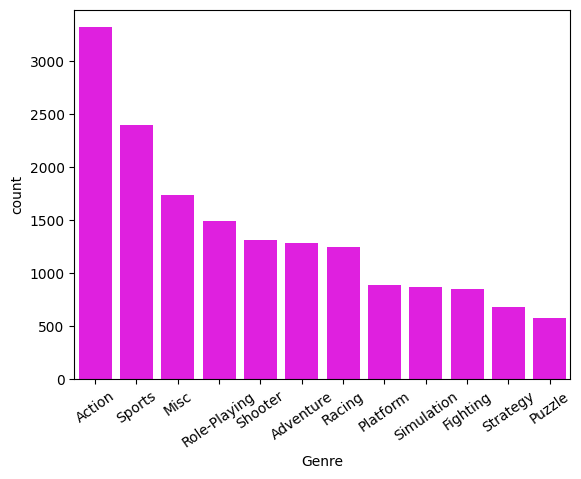

In [29]:
sns.countplot(x = 'Genre',data=data, order=data.Genre.value_counts().index, color = 'magenta')
plt.xticks(rotation=35)
plt.show()

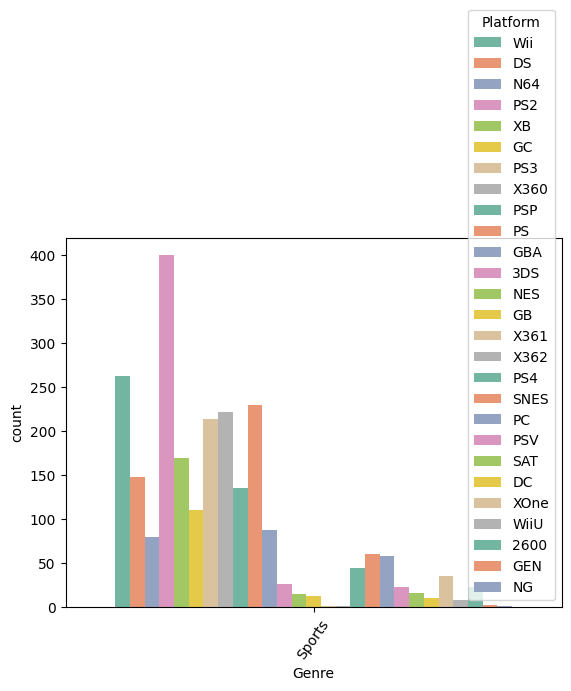

In [30]:
# 3 variable analysis/ vizalization
sns.countplot(x='Genre', data=data[data.Genre=='Sports'], hue='Platform' , palette = 'Set2')
plt.xticks(rotation=55)
plt.show()

The top 5 genres are action, sports, misc, role-playing, and shooter.

---

### Pie Chart

**What if instead of actual frequencues, we want see the proportion of the categories?**

Say, we want to compare the distrubution/proportion of sales across different regions?

Which plot can we use for this? A pie-chart!

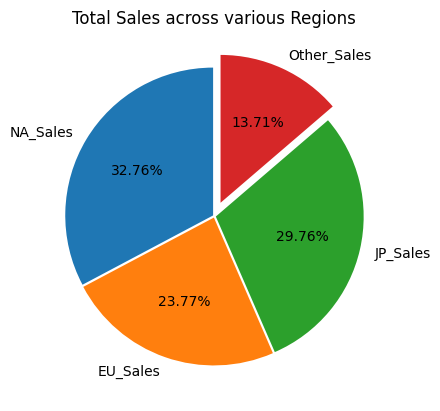

In [31]:
sales_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales = sales_data.sum()

plt.pie(region_sales,
       labels=region_sales.index,
       startangle=90,
       explode=(0.01,0.01,0.01,0.1),
       autopct = '%.2f%%') # label the wedges with their numeric value # most prefferd start is 90 degree

plt.title('Total Sales across various Regions')
plt.show()

In [32]:
sales_data.T.head().sum(axis=1)

,0
NA_Sales,45831.525845
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828


---

In [33]:
sales_data.sum()

,0
NA_Sales,45831.525845
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828


---

### Univariate Data Visualisation - Numerical Data

**What kind of questions we may have regarding a numerical variable?**

- How is the data distributed?
- Is the data skewed? Are there any outliers?
- How much percentage of data is below/above a certain number?
- Statistics like - Min, Max, Mean, Median, etc.

Now say you want to find the distribution of games released every year.

Unlike barplot, to see the distribution here we will have to `bin` the data.

**How can we understand popularity of video games year by year?**

### Histogram

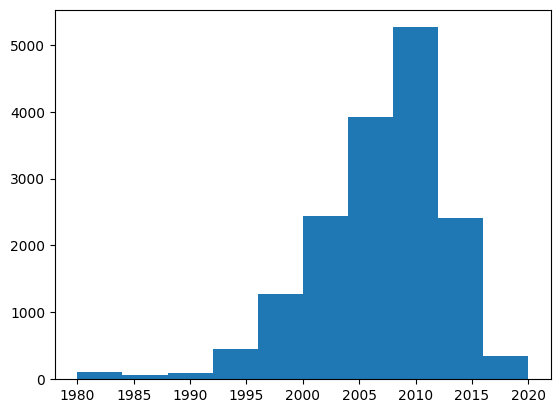

In [34]:
plt.hist(data['Year'])
plt.show()

- The curve is left skewed, with a lot more games being published in 2005-2015.
- This shows that games started becoming highly popular in the last 1-2 decades.
- Maybe could point to increased usage of internet worldwide.

If you notice, histograms are basically frequency charts.

We can also vary the number of bins. **The default number of bins is 10**

If we want to see this data per decade, we would need 40 years in 4 bins.

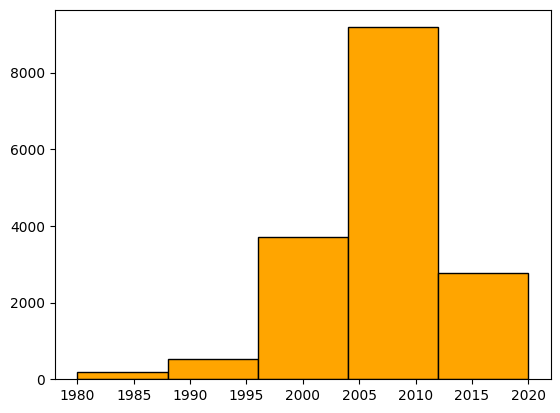

In [35]:
plt.hist(data['Year'], bins=5, edgecolor = 'black', color='orange')
plt.show()

We can also get the data of each bin, such as range of the boundaries, values, etc.

**How can we plot a histogram in Seaborn?**

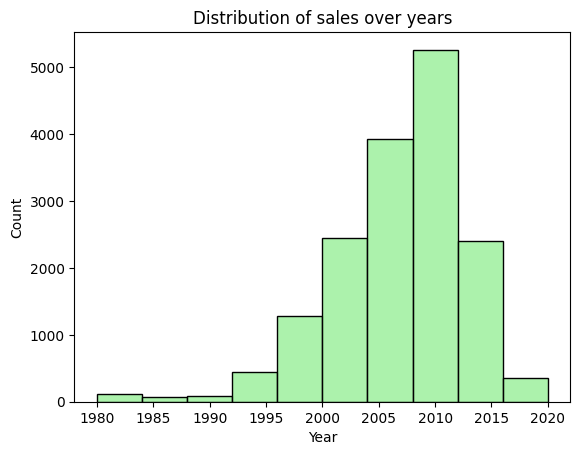

In [36]:
sns.histplot(data=data, x=data['Year'], bins=10, color='lightgreen')
plt.title('Distribution of sales over years')
plt.show()

Notice that,
- The boundaries are more defined than matplotlib's plotting.
- The x and y axis are labelled automatically.

---

### Kernel Density Estimate (KDE) Plot

- A KDE plot, similar to histrogram, is a method for visualizing the distributions.
- But instead of bars, KDE represents data using a **continuous probability density curve**.

**Why do we even need KDE plots?**

- Compared to histogram, KDE produces a plot which is **less cluttered** and **more interpretable**.
- Think of it as a **smoothened version** of a histogram.

\
Let's plot KDE using `seaborn`'s `kdeplot`.

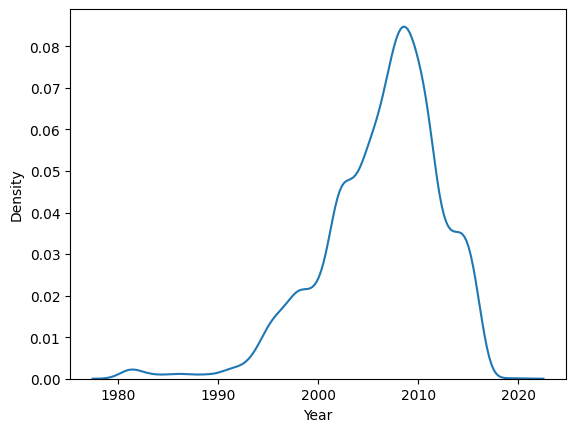

In [37]:
sns.kdeplot(data['Year'])
plt.show()

**Can you notice the difference between KDE plot and histogram?**

The Y-axis has **probability density estimation** instead of count.

You can read more about this on:
- https://en.wikipedia.org/wiki/Kernel_density_estimation
- https://www.youtube.com/watch?v=DCgPRaIDYXA



---

### Boxplot

**What if we want to find the aggregates like median, min, max and percentiles of the data.**

Say I want the typical earnings of a game when it is published.

**What kind of plot can we use here?** Boxplot

**What exactly is a Box plot?**

- A box plot or **box and whiskers plot** shows the **distribution of quantitative data**.
- It facilitates comparisons between
  - attributes
  - across levels

of a categorical attribute.

- The **box** shows the **quartiles** of the dataset.
- The **whiskers** show the **rest of the distribution**.
- Except for points that are determined to be **"outliers"** using a method that is a function of the **inter-quartile range**.

Let's go through the terminology one-by-one.

<!-- #### What's a quartile? -->

<!-- - Box plot shows distribution of numerical data and skewness through displaying the **data percentiles**, called **quartiles**. -->

#### Box plots show the five-number summary of data:
1. Minimum score
2. First (lower) quartile
3. Median
4. Third (upper) quartile
5. Maximum score

##### 1. Minimum Score
- It is the **lowest value**, excluding outliers.
- It is shown at the **end of bottom whisker**.

#### 2. Lower Quartile
- **25% of values** fall below the lower quartile value.
- It is also known as the **first quartile**.

##### 3. Median
- Median marks the **mid-point of the data**.
- It is shown by the **line that divides the box into two parts**.
- **Half the scores are greater than or equal to this value and half are less**.
- It is sometimes known as the **second quartile**.

##### 4. Upper Quartile
- **75% of values** fall below the upper quartile value.
- It is also known as the **third quartile**.

#### Maximum Score
- It is the **highest value**, excluding outliers.
- It is shown at the **end of upper whisker**.

#### Whiskers
- The upper and lower whiskers represent **values outside the middle 50%**.
- That is, the **lower 25% of values** and the **upper 25% of values**.

#### Interquartile Range (or IQR)
- This is the box plot showing the **middle 50% of scores**.
- It is the **range between the 25th and 75th percentile**.

\
**Let's plot a box plot to find the average typical earnings for a game.**

{'whiskers': [<matplotlib.lines.Line2D at 0x7ad217804220>,
 'caps': [<matplotlib.lines.Line2D at 0x7ad217804760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ad217a42410>],
 'medians': [<matplotlib.lines.Line2D at 0x7ad217804ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ad217804f40>],
 'means': []}

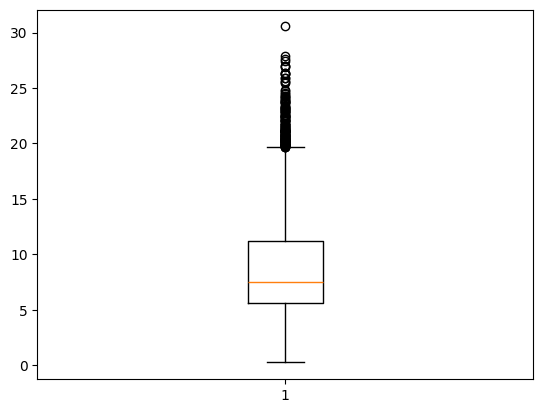

In [38]:
plt.boxplot(data['Global_Sales'])

Text(0.5, 1.0, 'Global Sales of video games')

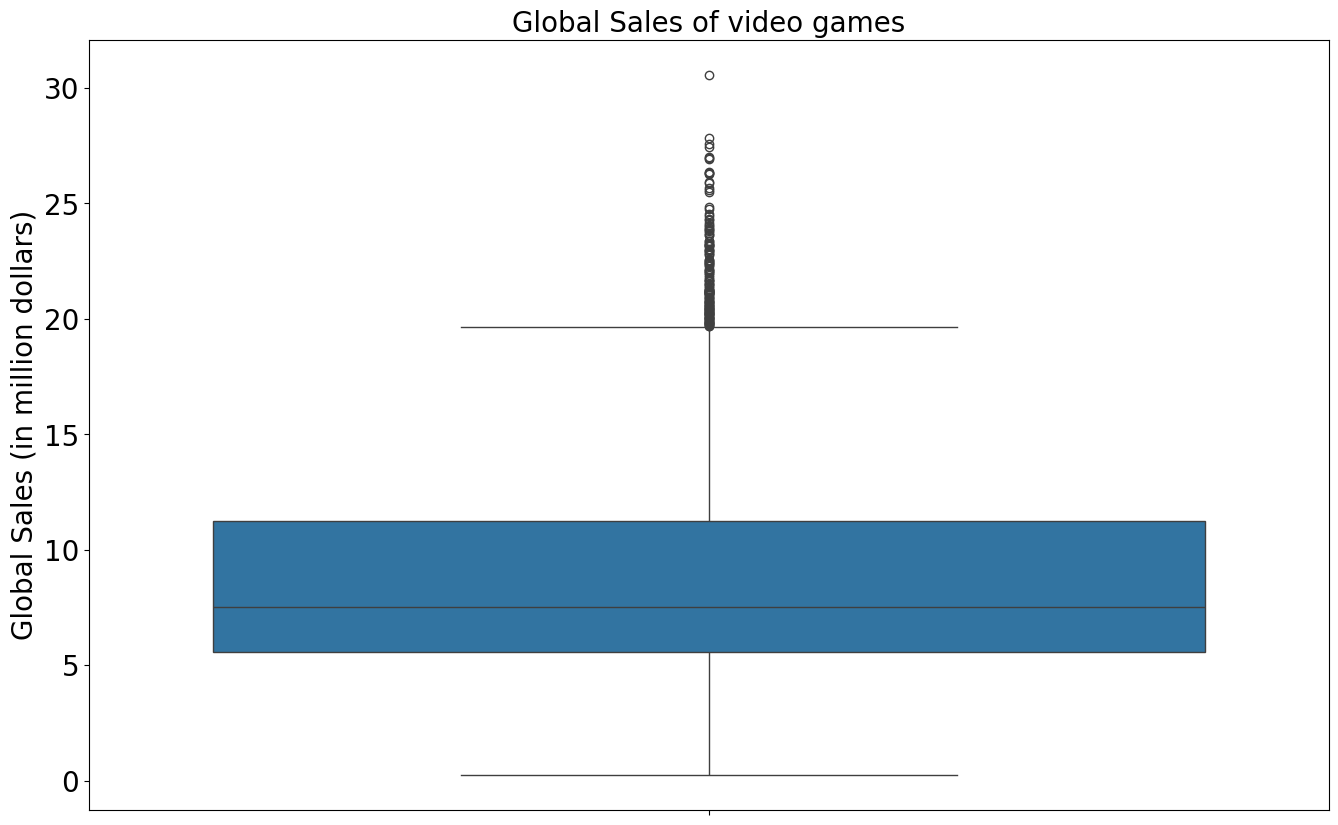

In [39]:
plt.figure(figsize=(16,10))
sns.boxplot(y = data["Global_Sales"])
plt.yticks(fontsize=20)
plt.ylabel('Global Sales (in million dollars)', fontsize=20)
plt.xticks(rotation=60)
plt.title('Global Sales of video games', fontsize=20)

**What can we infer from this?**

The 5 point estimates here are:
- Minimum, excluding outliers: 0
- Maximum, excluding outliers: 20 (in million dollars)
- 25th Quantile: 6 million
- Median: around 7 million
- 75th Quantile: 12 million

**Note:**
- The outliers always will appear either below the minimum or above the maximum.
- There are quite a few outliers above 20 million dollars, represented by black colored circles.

---

In [40]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


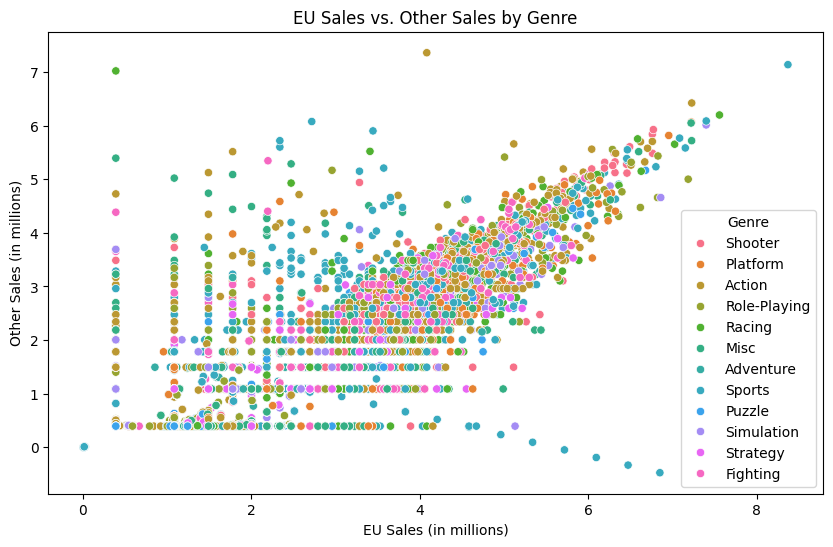

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EU_Sales', y='Other_Sales', hue='Genre', data=data) # the variable should be both numeric
plt.title('EU Sales vs. Other Sales by Genre')
plt.xlabel('EU Sales (in millions)')
plt.ylabel('Other Sales (in millions)')
plt.show()

# Observations

- L - shape pattern for the genre of games where the EU sales where low, meaning sales in other regions are not similar to the EU sales
- For higher sales values we see a stright cone trend where EU sales and other area sales are both high

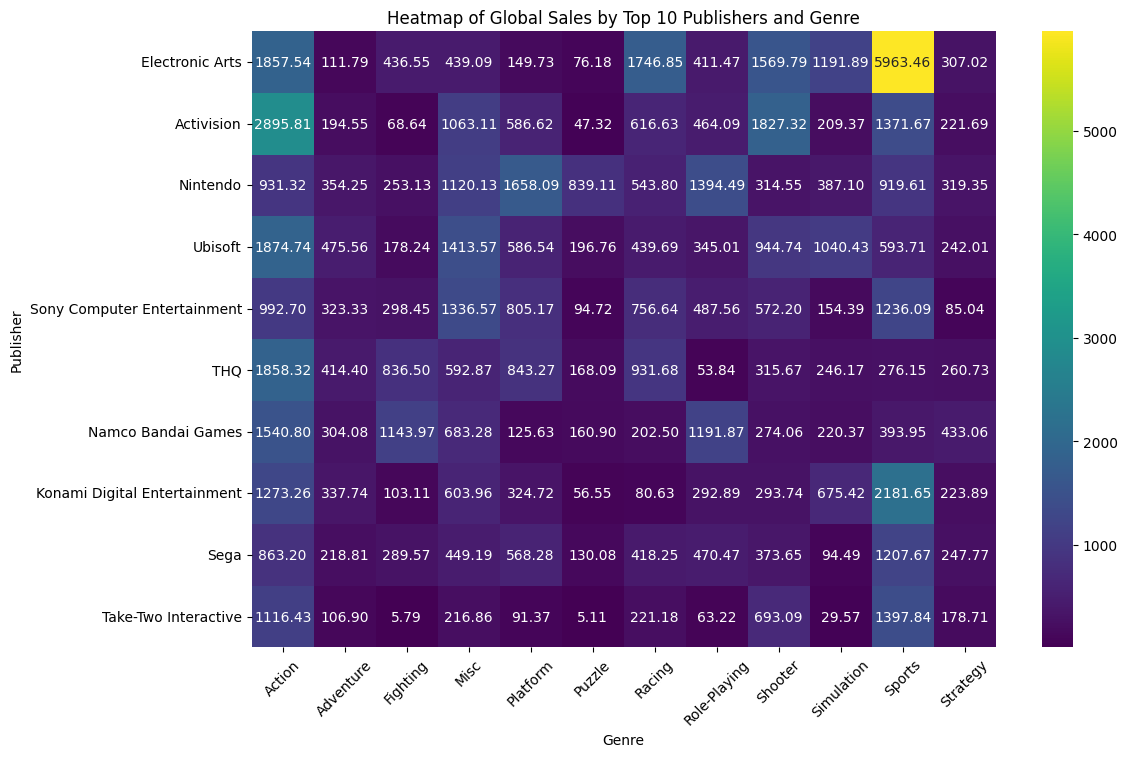

In [42]:
# Group by Publisher and Genre, then sum the sales for each combination
publisher_genre_sales = data.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().unstack()

# Get the top 10 publishers based on total global sales
top_10_publishers = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index

# Filter the sales data to include only the top 10 publishers
publisher_genre_sales = publisher_genre_sales.loc[top_10_publishers]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(publisher_genre_sales, annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap of Global Sales by Top 10 Publishers and Genre")
plt.xlabel("Genre")
plt.ylabel("Publisher")
plt.xticks(rotation=45)
plt.show()

In [43]:
top_10_publishers

Index(['Electronic Arts', 'Activision', 'Nintendo', 'Ubisoft',
       'Sony Computer Entertainment', 'THQ', 'Namco Bandai Games',
       'Konami Digital Entertainment', 'Sega', 'Take-Two Interactive'],
      dtype='object', name='Publisher')

# Observation

Activision has the highest sales amoung the top 10 publishers for the category of sports games

---

# **I. General tasks :**



# **1. Framed questions :**


 **Question - 1 :**

**Q.** A data scientist wants to analyze the spread of salaries within a company, looking for any outliers and understanding the distribution of salaries.

Which will be the best suited plot for this?

a) Boxplot

b) Bar graph

c) Heatmap

d) Histogram

**-:- Answer -:-**   Boxplot

**-:- Explanation -:-**

A boxplot is an effective way to display the spread of numerical data and highlight outliers. It provides a summary of data through the median, quartiles, and outliers, making it ideal for analyzing the distribution and variability of salaries within a company.

---

**Question - 2 :**

**Q.** A retail store wants to see the number of products sold in each category, such as electronics, clothing, and home goods, to compare their popularity.

Which will be the best suited plot for this?

a) Boxplot

b) Bar graph

c) Heatmap

d) Histogram

**-:- Answer -:-**   Bar graph

**-:- Explanation -:-**

A bar graph is ideal for comparing counts or frequencies across categories. In this case, it allows the store to see and compare the number of products sold in each category, making it easy to identify which product categories are most popular.

---

**Question - 3 :**

**Q.** In the state “Haryana”, we want to find the proportion of people who smoke.

Which will be the best suited plot for this?

a) Pie Chart

b) Bar Chart

c) Countplot

d) Boxplot

**-:- Answer -:-** Pie Chart

**-:- Explanation -:-**

A pie chart is an effective way to represent proportions or percentages within a whole. In this case, the proportion of people who smoke can be represented as a fraction of the entire population of "Haryana". Each section of the pie chart would represent a different category, such as smokers and non-smokers, allowing for a clear visual comparison of the proportion of smokers in the population.

---

**Question - 4 :**

**Q.** A researcher wants to understand the correlation between different features in a dataset, such as age, income, and education level.

Which will be the best suited plot for this?

a)Line Plot

b) Histogram

c) Heatmap

d) KDE plot

**-:- Answer -:-** Heatmap

**-:- Explanation -:-**

A heatmap is ideal for visualizing correlations between numerical variables. By showing different intensity levels, it highlights the strength of correlations, allowing the researcher to quickly see relationships between age, income, and education.

---

**Question - 5 :**

**Q.** To understand the distribution of heights among a group of people, a fitness analyst wants to identify common height ranges and frequency.

Which will be the best suited plot for this?

a) Pairplot

b) KDE plot

c) Histogram

d) Scatter Plot

**-:- Answer -:-** Histogram

**-:- Explanation -:-**

A histogram displays the distribution of numerical data by dividing it into bins, making it easy to see the range in which most people’s heights fall. The peaks in the histogram reveal the most common height ranges.



---

**Question - 6 :**

**Q.** The telecom company "Airtel" wants to find the count customers across different payment modes opted by the customer.

Which will be the best suited plot for this?

a) Pie Chart

b) Countplot

c) Line Plot

d) Boxplot

**-:- Answer -:-** Count Plot

**-:- Explanation -:-**

A countplot is specifically designed for visualizing the count of observations in each category of a categorical variable. In this case, the payment modes are categorical variables, and the countplot will provide a clear representation of the number of customers using each payment mode. This makes it ideal for comparing the distribution of customers across different payment modes.

---

**Question - 7 :**

**Q.** A statistician wants to visualize the smooth distribution of exam scores to understand if the scores are normally distributed or skewed.

Which will be the best suited plot for this?

a) Bar graph

b) Scatter Plot

c) Pie Chart

d) KDE plot

**-:- Answer -:-** KDE plot

**-:- Explanation -:-**

A KDE (Kernel Density Estimate) plot provides a smooth curve that represents the distribution of data. This is useful for visualizing the shape and spread of exam scores, allowing the statistician to identify skewness or normal distribution without the rigidity of a histogram.

---

**Question - 8 :**

**Q.** A financial analyst wants to observe changes in stock prices over time for trend analysis.

Which will be the best suited plot for this?

a) Countplot

b) Line Plot

c) Boxplot

d) Pairplot

**-:- Answer -:-**  Line Plot

**-:- Explanation -:-**

A line plot is suitable for visualizing trends over time. By plotting stock prices along the y-axis and time on the x-axis, the analyst can observe changes, patterns, and fluctuations in stock prices.

---

**Question - 9 :**

**Q.** For analyzing marks given by an edtech company, we want to find the range in which the most number of students have scored.

Which will be the best suited plot for this?

a) Pie Chart

b) Histogram

c) Countplot

d) Line Plot

**-:- Answer -:-** Histogram

**-:- Explanation -:-**

A histogram provides a visual representation of the distribution of numerical data, divided into intervals called bins. It allows you to see the frequency or count of data points within each bin, making it ideal for identifying the range in which the most number of students have scored. By observing the peak(s) in the histogram, you can easily determine the range(s) with the highest frequency of scores.

---

**Question - 10 :**

**Q.** An e-commerce company wants to visualize pairwise relationships in data between variables like purchase amount, time spent, and age of customers.

Which will be the best suited plot for this?

a) Scatter Plot

b) Histogram

c) Pairplot

d) Pie Chart

**-:- Answer -:-** Pairplot

**-:- Explanation -:-**

A pairplot is useful for exploring relationships between multiple variables in a dataset. It creates scatter plots between each pair of variables, making it easy to identify correlations and patterns in the data.

---

**Question - 11 :**

**Q.** A school administration wants to show the percentage of students enrolled in different courses (e.g., math, science, history) for comparison.

Which will be the best suited plot for this?

a) Pie Chart

b) Heatmap

c) KDE plot

d) Scatter Plot

**-:- Answer -:-** Pie Chart

**-:- Explanation -:-**

A pie chart is ideal for showing proportions or percentages within a whole. Here, it allows the school administration to represent the enrollment distribution across different courses visually.

---

**Question - 12 :**

**Q.** A scientist wants to observe the relationship between temperature and humidity to find any pattern in their correlation.

Which will be the best suited plot for this?

a) Histogram

b) Countplot

c) Line Plot

d) Scatter Plot

**-:- Answer -:-** Scatter Plot

**-:- Explanation -:-**

A scatter plot is effective for visualizing relationships between two continuous variables, such as temperature and humidity. Each point represents an observation, allowing the scientist to identify any correlation pattern between these variables.

---

# **2. Required plottings :**



# **Plotting global sales across different genres with Box plot :**
# **Q1) To examine the distribution of global sales across different genres ?**

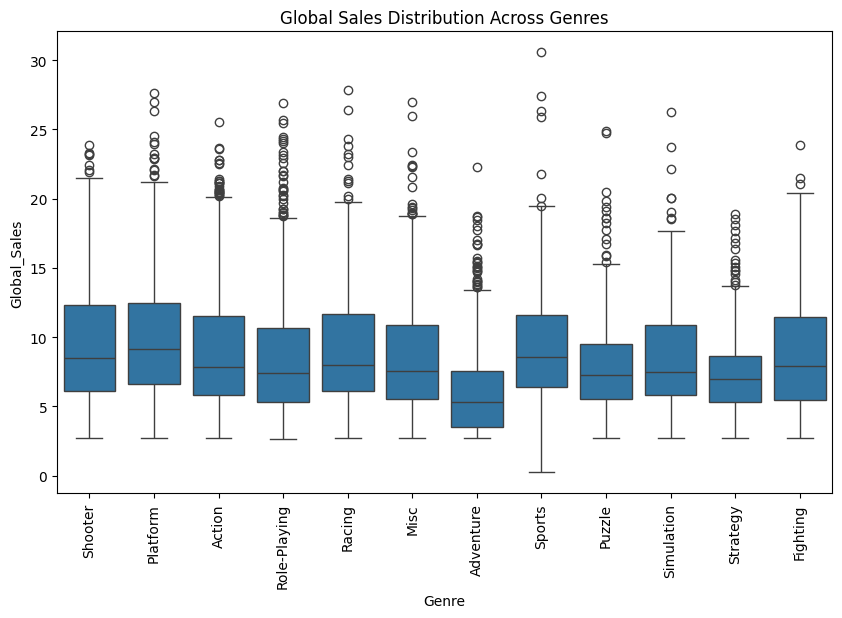

In [63]:
# Quartiles, Outliers, Genres with high outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Genre', y='Global_Sales')
plt.xticks(rotation=90)
plt.title("Global Sales Distribution Across Genres")
plt.show()

# **Observations :**
* Boxplot shows a wide spread of Global_Sales across genres, with notable
outliers in the Action and Sports genres.
* Quartiles : Computes the 25th, 50th (median), and 75th percentiles of Global_Sales for each genre.
* IQR and Outliers : Calculates outliers as points beyond 1.5 times the IQR for each genre and stores them in a dictionary.
* Genres with High Outliers : Lists genres with outlier sales values.

---

# **Plotting Global Sales Across Regions with a Bar Graph :**
# **Q2) To visualize average global sales across different regions, we want to compare average sales per genre ?**

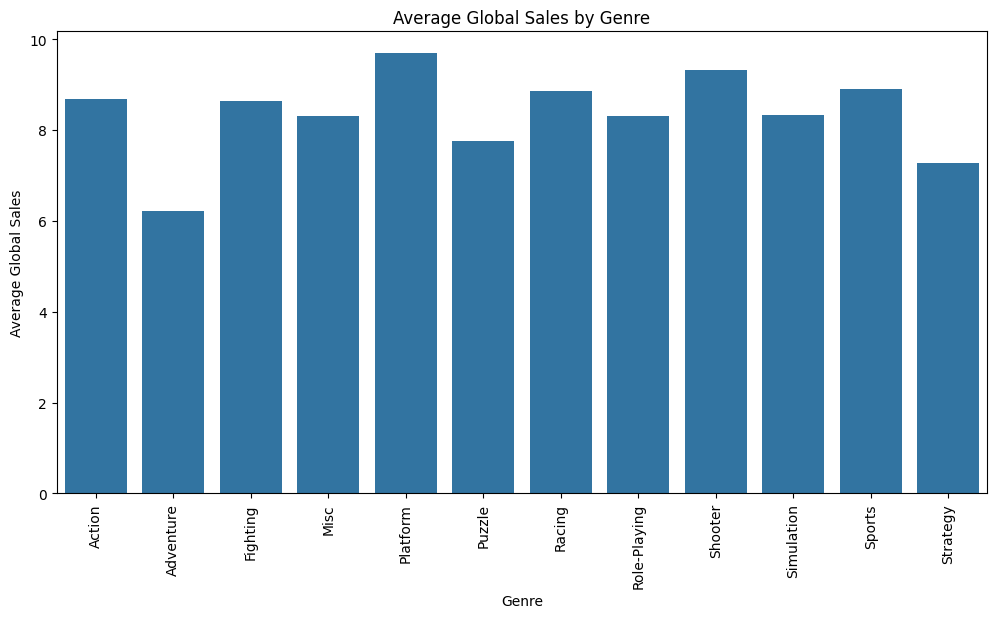

In [75]:
avg_sales_by_genre = data.groupby('Genre')['Global_Sales'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sales_by_genre.index, y=avg_sales_by_genre.values)
plt.xticks(rotation=90)
plt.title("Average Global Sales by Genre")
plt.ylabel("Average Global Sales")
plt.xlabel("Genre")
plt.show()

# **Observation :**
Bar graph shows the average global sales for each genre, with some genres like Action, Shooter, Sports, Puzzle and Strategy, and Variation Across Genres showing significantly higher sales compared to others.

---

# **Plotting Sales Trend Over Time with a Line Plot :**
# **Q3) To observe the trend of global sales over time, we can use a line plot ?**

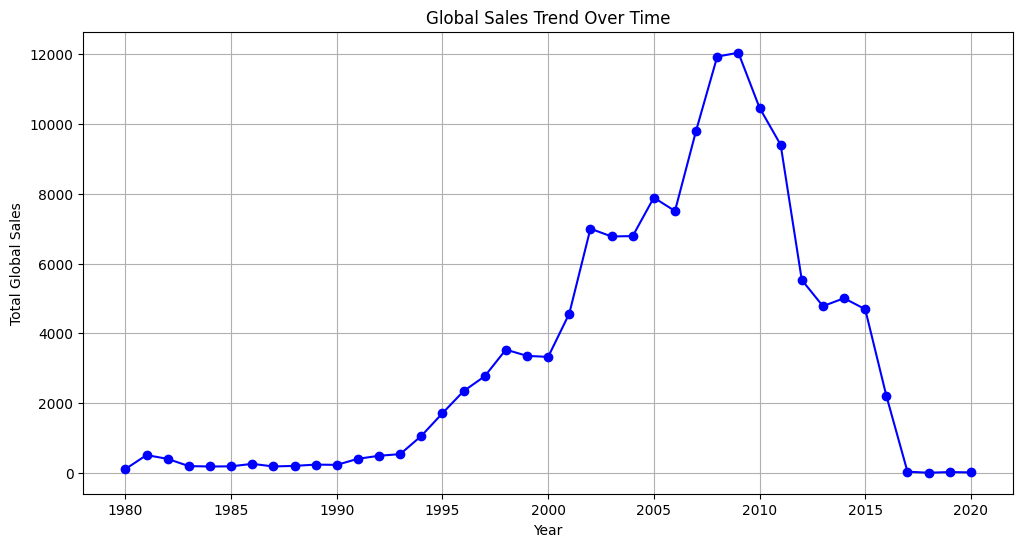

In [76]:
sales_by_year = data.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color='b')
plt.title("Global Sales Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Global Sales")
plt.grid()
plt.show()

# **Observation :**
The **Line plot** reveals periods with significant peaks in sales, indicating potential factors such as new releases or market expansions.

---

# **Plotting the distribution of global sales with a KDE Plot :**
# **Q4) To analyze the distribution of global sales values, a KDE plot provides a smooth density curve ?**

<ipython-input-77-5fce7eb37d48>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Global_Sales'], shade=True, color='purple')


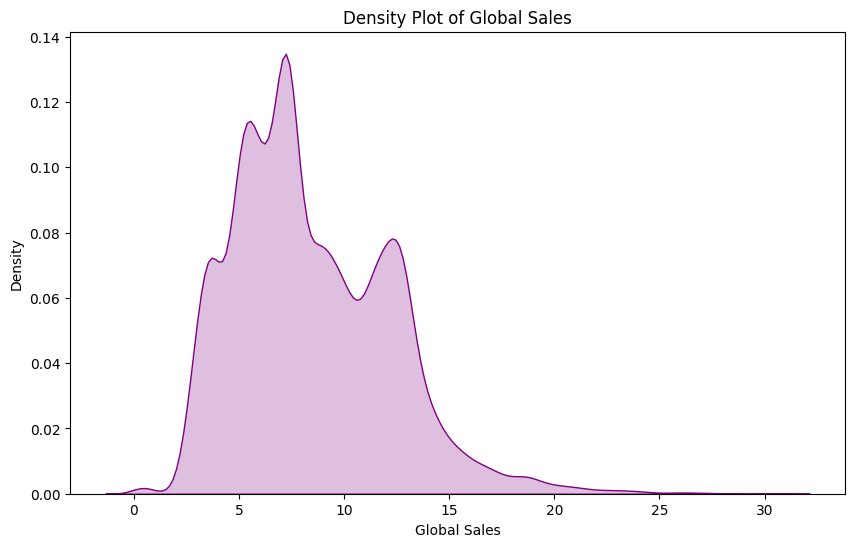

In [77]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Global_Sales'], shade=True, color='purple')
plt.title("Density Plot of Global Sales")
plt.xlabel("Global Sales")
plt.show()

# **Observation :**
The **KDE plot** shows where most sales values concentrate, indicating popular sales amounts and tail distributions.



---

# **Plotting the Genre Popularity with a Pie Chart :**
# **Q5) To view the proportion of each genre in terms of total games released, a pie chart is useful ?**

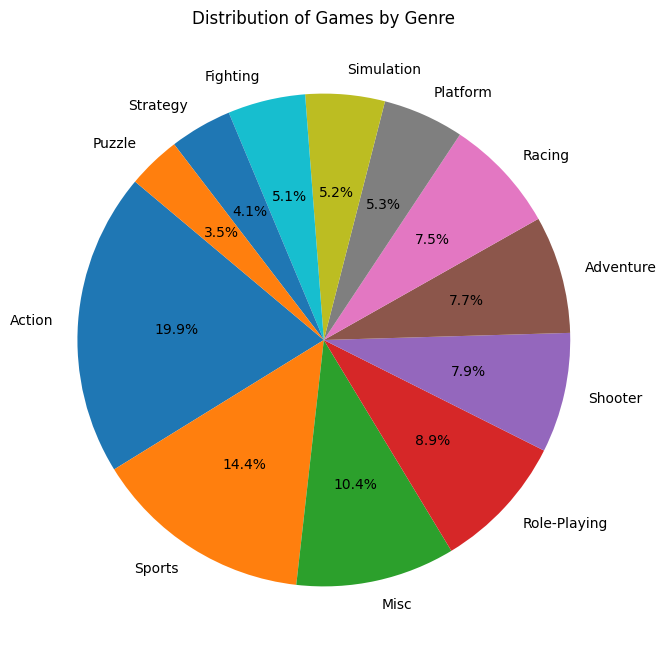

In [78]:
genre_counts = data['Genre'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Games by Genre")
plt.show()

# **Observation :**
The **Pie chart** visually highlights the most and least popular genres, based on the number of games released in each category.

---

# **Plotting the Correlation Matrix with a Heatmap :**
# **Q6) To understand correlations between numeric features, a heatmap of the correlation matrix is effective ?**

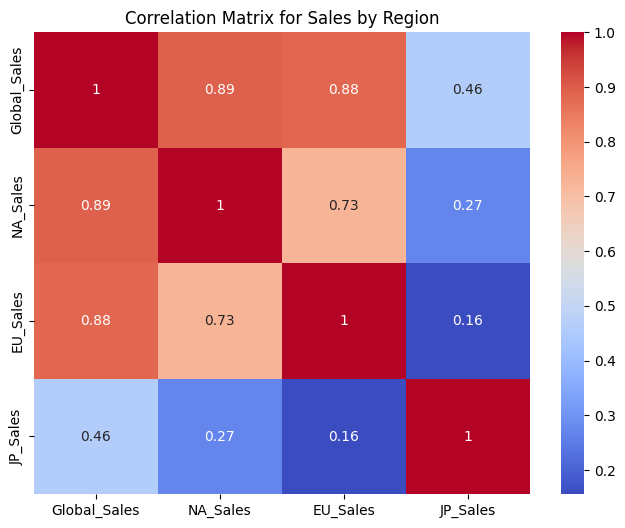

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Sales by Region")
plt.show()

# **Observation :**
The **Heatmap** reveals correlations between sales in different regions, helping to identify patterns like regional popularity overlap.

---

# **Plotting the Comparison of Global Sales with a Scatter Plot :**
# **Q7) To compare EU and NA sales for each game, a scatter plot helps visualize their relationship ?**

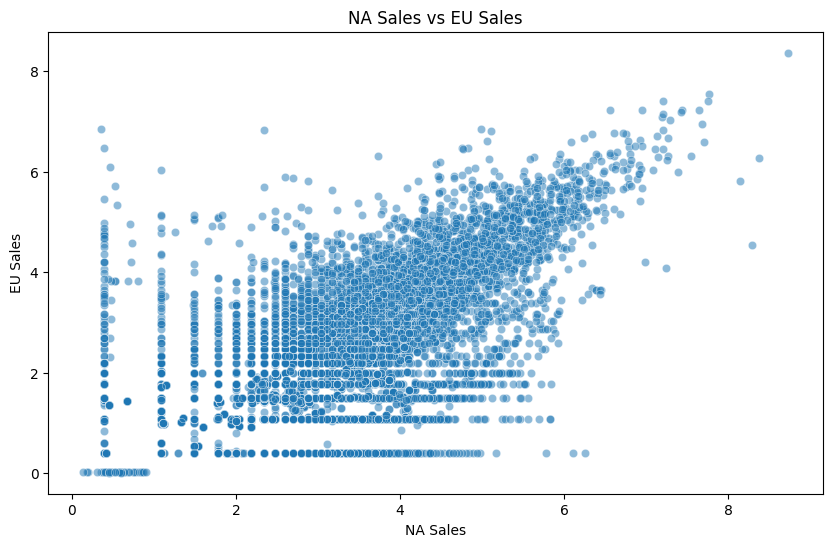

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='NA_Sales', y='EU_Sales', alpha=0.5)
plt.title("NA Sales vs EU Sales")
plt.xlabel("NA Sales")
plt.ylabel("EU Sales")
plt.show()

# **Observation :**
The **Scatter plot** shows whether games popular in NA tend to perform well in the EU market, revealing any linear or cluster patterns.

---

# **Plotting the Distribution of Global Sales with a Histogram :**
# **Q8) To observe how global sales are distributed across games, we can use a histogram?**

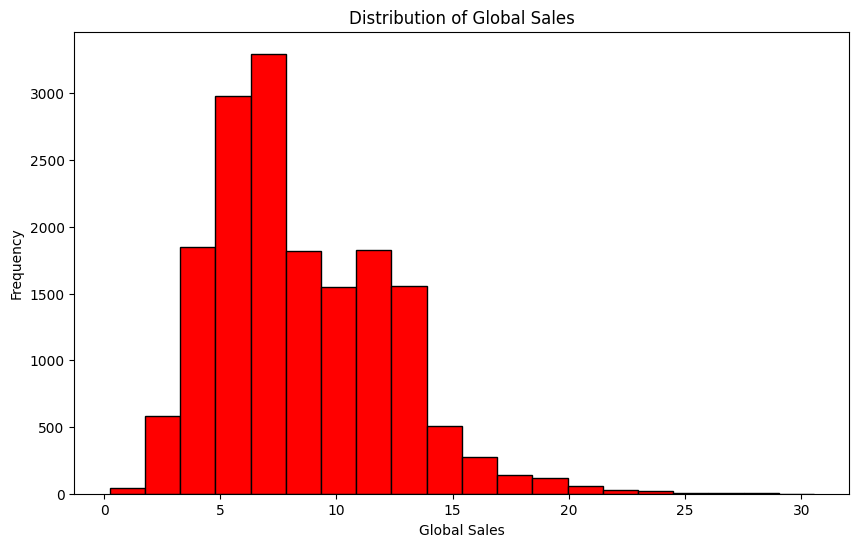

In [81]:
plt.figure(figsize=(10, 6))
count, bins, _ = plt.hist(data['Global_Sales'], bins=20, edgecolor = 'black', color='red')
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales")
plt.ylabel("Frequency")
plt.show()

# **Observation :**
The **Histogram** shows the frequency distribution of sales values, with peaks at specific ranges indicating common sales amounts.

---

# **Pairplot to Visualize Relationships Among Sales Data :**
# **Q9) To visualize the relationships and distributions among different regional sales metrics, a pairplot is useful ?**

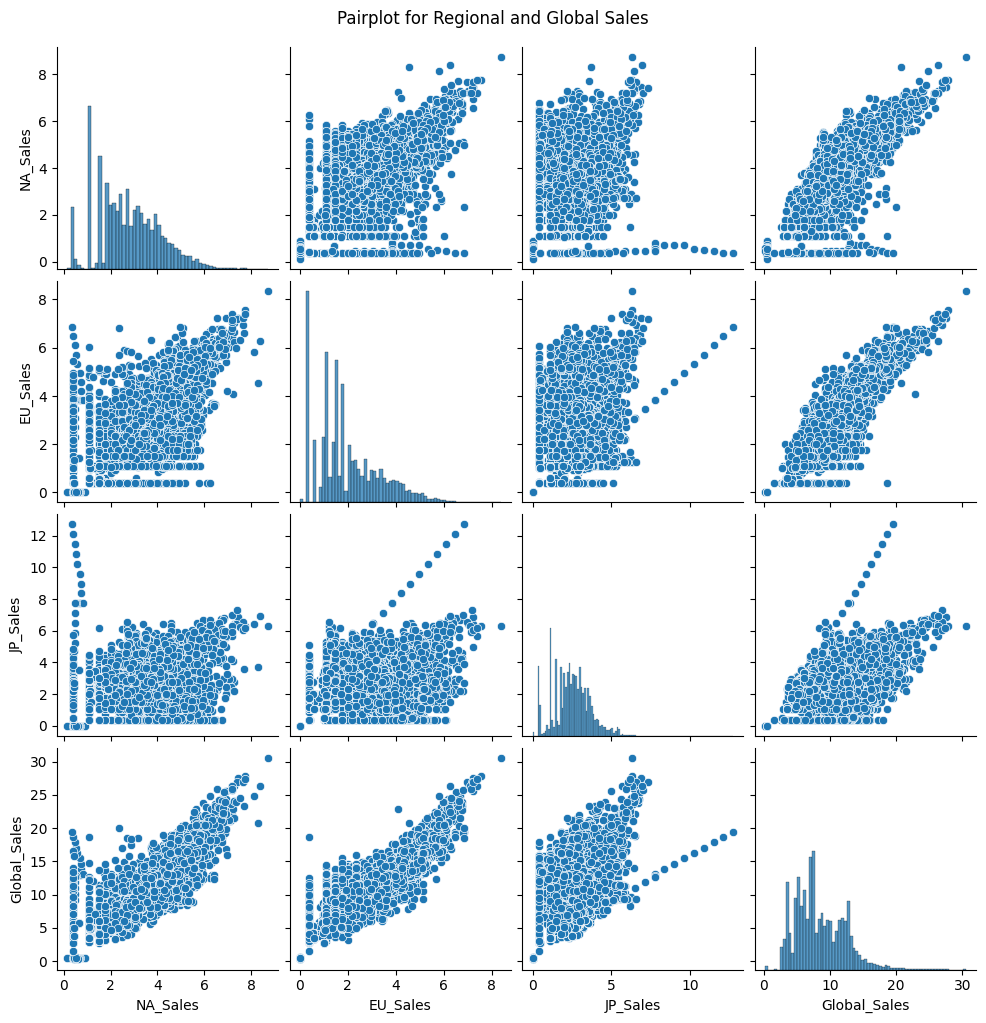

In [74]:
sns.pairplot(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']])
plt.suptitle("Pairplot for Regional and Global Sales", y=1.02)
plt.show()

# **Observation :**
The **Pairplot** helps to quickly spot correlations and distributions between NA, EU, JP, and Global Sales. Diagonal plots show the sales distribution per region, while scatter plots reveal potential relationships across regions.

---

# **II. Specific tasks (Required on Dataset for next stage of data model)(Data encoding):**

# Data Conversion :
**1.  Conversion of  date and time from string to date(Year, Month, Day) & time(Hours, minutes) format :**

In [82]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute # if you want as minutes are not mentioned
df.head()

<ipython-input-82-3a4ebfba6603>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,2006,12,16,17,24
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,2006,12,16,17,25
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,2006,12,16,17,26
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,2006,12,16,17,27
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,2006,12,16,17,28


In [83]:
type(df['DateTime'])

pandas.core.series.Series

# **Observation :**


* Here, I am Converting  the date and time from string to date(Year, Month, Day) & time(Hours, minutes) format type for doing prediction.


In [84]:
df.describe(include='object')

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


In [85]:
df.describe()

,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute
count,2.049280e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,6.458447e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,1.150076e+01,2.950017e+01
min,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,6.000000e+00,1.500000e+01
50%,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01
75%,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01
max,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01
std,8.437154e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,6.922227e+00,1.731810e+01


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   DateTime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
dtypes: datetime64[ns](1), float64(1), int32(5), object(8)
memory usage: 197.9+ MB


---

# Data encoding :
**2. Finding whether the day is a holiday or not (0 = not holiday, 1= holiday) :**

In [107]:
# Start of my data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

In [88]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,Year,Month,Day,Hour,Minute,Is_holiday,Light
2075254,26/11/2010,0.873611,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,20,58,0.0,0
2075255,26/11/2010,0.874306,0.944,0.0,240.0,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,20,59,0.0,0
2075256,26/11/2010,0.875000,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,21,0,0.0,0
2075257,26/11/2010,0.875694,0.934,0.0,239.7,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,21,1,0.0,0
2075258,26/11/2010,0.876389,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,2010,11,26,21,2,0.0,0


# Observations :
* Here, I found the holidays are marked as 1.
* Here, I found the working days are marked as 0.

---

**3. Find if the there is sunlight during the time given in the dataset ( 0600-1800 hours ---1 (light is there) else 0) :**

In [94]:
# Start of my data encoding
import pandas as pd

data = {'Time': ['0500', '0600', '1200', '1800', '1900']}  # Example times in HHMM format
df = pd.DataFrame(data)

def is_sunlight(time_str):
    # Ensure time is in string format
    time_str = str(time_str)

    # Extract hours and minutes from the time string
    hours = int(time_str[:2])

    # Check if the time is within the sunlight hours (0600 to 1800)
    if 6 <= hours < 18:
        return 1  # Sunlight is present
    else:
        return 0  # No sunlight

# Applying the function to check for sunlight
df['Is_sunlight'] = df['Time'].apply(lambda x: is_sunlight(x))

# Display the DataFrame
print(df)

   Time  Is_sunlight
0  0500            0
1  0600            1
2  1200            1
3  1800            0
4  1900            0


# Observations :
* The code checks if the time in the Time column is between 0600 (6:00 AM) and 1800 (6:00 PM).
* It assigns 1 if sunlight is present (time between 6 AM and 6 PM) and 0 otherwise.
* The function uses apply() to create a new Is_sunlight column indicating sunlight availability.



---

**4. Data Visualization on the newly created columns :**

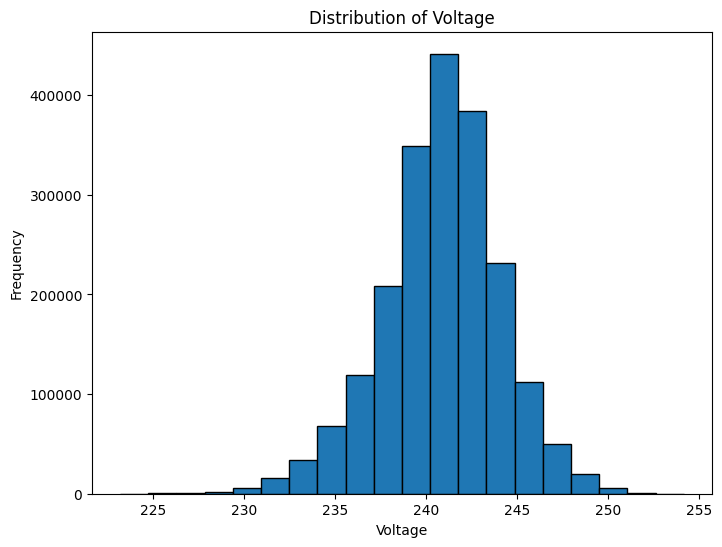

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Voltage' is numeric, converting errors to NaN
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Drop rows with NaN values in 'Voltage' column
df = df.dropna(subset=['Voltage'])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Voltage'], bins=20, edgecolor='black')
plt.xlabel('Voltage')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.show()

# Observation :
* Here, I observe that the code converts the 'Voltage' column to numeric values, handles errors by turning invalid values into NaN, removes rows with missing Voltage data, and then plots a histogram of the Voltage distribution.

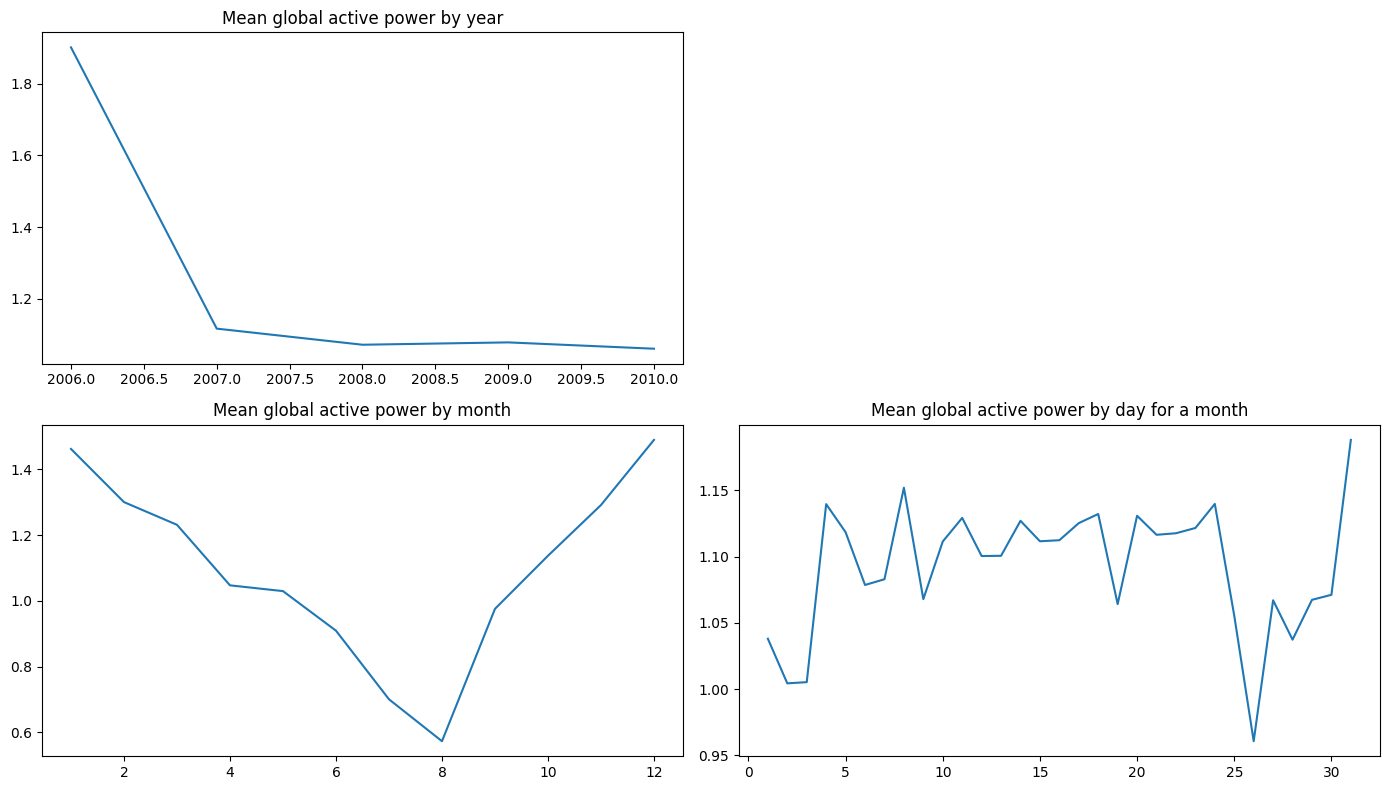

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'Date' column is in datetime format (adjust if it's in a different format)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Adjust dayfirst as needed

# Extract 'Year', 'Month', and 'Day' from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Ensure 'Global_active_power' is numeric (force conversion to numeric, errors will be set to NaN)
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Now you can group by 'Year', 'Month', and 'Day' for plotting
plt.figure(figsize=(14, 8))

# Plot 1: Mean Global Active Power by Year
plt.subplot(2, 2, 1)
df.groupby('Year').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by year')

# Plot 2: Mean Global Active Power by Month
plt.subplot(2, 2, 3)
df.groupby('Month').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by month')

# Plot 3: Mean Global Active Power by Day
plt.subplot(2, 2, 4)
df.groupby('Day').Global_active_power.agg('mean').plot()
plt.xlabel('')
plt.title('Mean global active power by day for a month')

plt.tight_layout()
plt.show()

# Observation :
* Here, I observed that the three plots of the mean global active power:

1. **Mean Global Active Power by Year**: Shows how global active power varies on average across different years.
2. **Mean Global Active Power by Month**: Displays the average power usage across different months.
3. **Mean Global Active Power by Day**: Highlights daily fluctuations in global active power over a month.